# Dark energy
## Parametrization, models and constraints

### Dhiraj Kumar Hazra, IMSc, Chennai


We will be discussing codes to compute the following quantities

* Cosmological Distances with variable equation state for dark energy 
* Scalar field model of dark energy
* Dark energy parametrization
  1. CPL parametrization
  2. Phenomenological models of decaying dark energy
* BAO
* CMB summary statistics
* Parameter estimation


We will discuss three ways to parametrize dark energy. 

**This notebook assumes flat Universe. You need to change some formulae in order to use spatial curvature**

### References

Refereces are provided in each sections.

#### Import the necessary libraries

In [1]:
import numpy as np
from astropy.cosmology import Planck15 as cosmo
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
from matplotlib import rc
from scipy import integrate 
rc('text', usetex=True)

**Constants** 

We will need constants such as speed of light and unit conversion factors etc. I have stored them in constants.py file

**Planck**

While we will constrain the cosmological parameters using observations in the upcoming lectures, to calculate cosmological quantities based on a baseline cosmology and the baseline parameter values, we need the best fit/mean values of the parameters. Here in Planckbf.py I have noted down the Planck 2018 baseline bestfits. 


In [2]:
import constants as const 
import Planckbf as Pl

## Friedmann Equations

1. $$H^2=\left(\frac{\dot a}{a}\right)^2=\frac{8\pi G}{3}\rho - \frac{Kc^2}{a^2}$$

2. $$\dot{H}+H^2=\left(\frac{\ddot a}{a}\right)=-\frac{4\pi G}{3}\left(\rho+\frac{3p}{c^2}\right)$$

### Defining redshifts

In [3]:
# Concept of Redshift
def az(z):
    az=1.0/(1+z)
    return az

## Parameterizing the equation of state of dark energy

### CPL parametrization

Refs: Int.J.Mod.Phys.D 10 (2001) 213-224, Phys.Rev.Lett. 90 (2003) 091301

$w(z)$ is defined as:

$$w(a)=w_0+w_a(1−a)$$

In [1]:
def w(a,w0,wa):
    return w0+(1.0-a)*wa

### Define $\Omega_{DE} (z)$

When $w(z)\ne-1$ the dark energy density does not represent a cosmological constant. Therefore we need to derive the $\Omega_{DE} (z)$ from $w(z)$

$$\Omega_{DE}(z)=\Omega_{DE,0}\times \exp\left[3\int_{0}^z\frac{1+w(z')}{1+z'}dz'\right]$$

we will use,

$$\Omega_{DE}(a)=\Omega_{DE,a=1}\times \exp\left[-3\int_{1}^a(1+w(a'))d\ln a'\right]$$

In [5]:
def eos_integrand(lna,w0,wa):
    a=np.exp(lna)
    wnow=w(a,w0,wa)
    eos_integrand=(1+wnow)
    return eos_integrand

def OmegaDE(a,OmegaDE0,w0,wa):
    #Integrating from today to an earlier time in lna
    factor=integrate.romberg(eos_integrand,0,np.log(a),args=(w0,wa),rtol=1e-3)
    OmegaDE=OmegaDE0*np.exp(-3.0*factor)
    return OmegaDE

In [6]:
def deta(a,Om_m,Om_k,Om_r,H0,w0,wa):
    Om_de0=1-Om_m-Om_k-Om_r
    Om_de=OmegaDE(a,Om_de0,w0,wa)
    asquareH=H0*np.sqrt((Om_m*a)+Om_r+(Om_k*a**2)+(Om_de*a**4))
    deta=const.CKm/asquareH
    return deta

def eta(a,Om_m,Om_k,Om_r,H0,wo,wa):
    #In Mpc
    eta=integrate.romberg(deta,0,a,args=(Om_m,Om_k,Om_r,H0,w0,wa),rtol=1e-3)    
    return eta    


Omm=Pl.Omega_mB
Oml=Pl.Omega_lB
Omr=Pl.Omega_rB
Omk=0
w0_base=-1.0
wa_base=0.0
H0=Pl.H0B

## Distances

### Comoving distance

As mentioned before the comoving distance is given by,

$$d_C(z)=f\left(\int^t_{t_0}\frac{c dt}{a(t)}\right)$$

we define integral for flat case for now. However, it is trivial to change the integral to a $\sin$ or $\sinh$ function.

In [7]:
def Comov_Distance(a,Om_m,Om_k,Om_r,H0,w0,wa):
    #In Mpc
    Comov_Distance=integrate.romberg(deta,a,1,args=(Om_m,Om_k,Om_r,H0,w0,wa)
    ,rtol=1e-3)    
    return Comov_Distance    

def d_H(a,Om_m,Om_k,Om_r,H0,w0,wa):
    Om_de0=1-Om_m-Om_k-Om_r
    Om_de=OmegaDE(a,Om_de0,w0,wa)    
    d_H=const.CKm*(a**2.0)/H0*np.sqrt((Om_m*a)+Om_r+(Om_k*a**2)+(Om_de*a**4))
    return d_H

### Angular diameter distance

Defined as (flat universe):

$$d_A(z)=a(z)d_C(z)$$

In [8]:
def Ang_Diam_Distance(a,Om_m,Om_k,Om_r,H0,w0,wa):
    #In Mpc
    Ang_Diam_Distance=a*Comov_Distance(a,Om_m,Om_k,Om_r,H0,w0,wa)
    return Ang_Diam_Distance    

### Luminsity distance

Defined as:

$$d_L(z)=d_C(z)/a(z)=d_A(z)/a^2(z)$$

In [2]:
def Lum_Distance(a,Om_m,Om_l,Om_r,H0):    
    Lum_Distance=Ang_Diam_Distance(a,Om_m,Om_k,Om_r,H0,w0,wa)/a**2
    return Lum_Distance    

### Distance modulus

$$\mu=m-M=5\log_{10}\left[d_L(\mathrm{Mpc})\right]+25$$

In [10]:
def distance_modulus(z,Om_m,Om_k,Om_r,H0,w0,wa):
    a=az(z)
    distance_modulus=5.0* np.log10(Lum_Distance(a,Om_m,Om_k,Om_r,H0,w0,wa)) + 25.0
    return distance_modulus

#### Plot the distance modulus

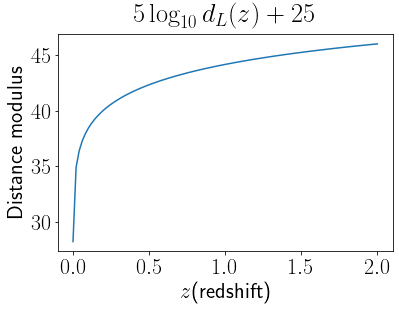

In [11]:
z=np.linspace(1e-3,2,100)

mu=np.zeros(len(z))
for i in range(len(z)):
    mu[i]=distance_modulus(z[i],Omm,Omk,Omr,H0,w0_base,wa_base)

plt.plot(z,mu)
plt.xlabel("$z$(redshift)")
plt.ylabel("Distance modulus")
plt.title(r'$5\log_{10}d_L(z)+25$')
plt.show()

## Quintessence model of dark energy

Ref: Scherrer R. J. & Sen A. A., 2008, Phys. Rev. D 77, 083515; Tsujikawa https://arxiv.org/pdf/1304.1961.pdf

Scalar field model of dark energy with power law potentials

$$\gamma'=−3\gamma(2−\gamma) +\lambda(2−\gamma)\sqrt{3\gamma\Omega_\phi}$$
$$\Omega'_\phi= 3(1−\gamma)\Omega_\phi(1−\Omega_\phi)$$
$$\lambda'=−\sqrt{3}\lambda^2(\Gamma−1)\sqrt{\gamma\Omega_\phi}$$,

where,
$$\Gamma=V(\phi)\frac{\frac{d^2V(\phi)}{d\phi^2}}{\left(\frac{dV(\phi)}{d\phi}\right)^2}.$$

In [40]:
# Define the power law
# This defines the potential $V(\phi)\propto \phi^N$
Npower=4.0
# That gives Gamma as:
Gamma=(Npower-1.0)/Npower

#the equations
def quintessence_eqn(ydydx,x):
#Autonomous equations
    gamma,Omegaphi,lam=ydydx
    dgamma=-3.0*gamma*(2.0-gamma)+lam*(2.0-gamma)*np.sqrt(3.0*gamma*Omegaphi)
    dOmegaphi=3.0*(1.0-gamma)*Omegaphi*(1.0-Omegaphi)
    dlam=-np.sqrt(3.0)*lam*lam*(Gamma-1.0)*np.sqrt(gamma*Omegaphi)
    return [dgamma,dOmegaphi,dlam]

In [48]:
# Initial conditions
lna_min=np.log(1e-3)
lna_max=np.log(1.0)
lna_array=np.linspace(lna_min,lna_max,500)

gamma_ic=1e-5
Omegaphi_ic=1e-8
lambda_ic=1
dydx_ic=[gamma_ic,Omegaphi_ic,lambda_ic]

# Solve DE equations

soln_de=integrate.odeint(quintessence_eqn,dydx_ic,lna_array)

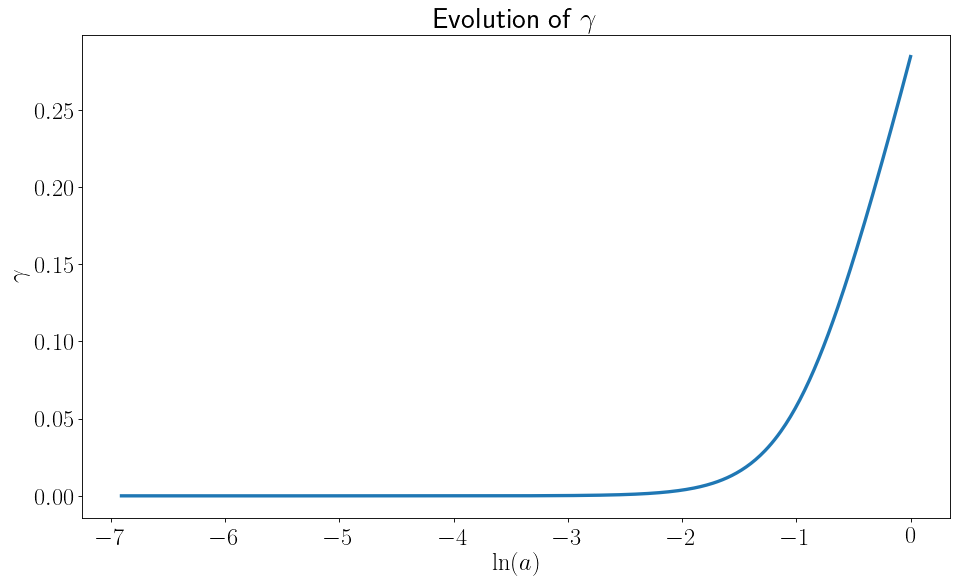

In [43]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(lna_array,soln_de[:,0], linewidth = 3)
plt.xlabel(r"$\ln (a)$")
plt.ylabel(r"$\gamma$")
plt.title(r'Evolution of $\gamma$')
plt.show()

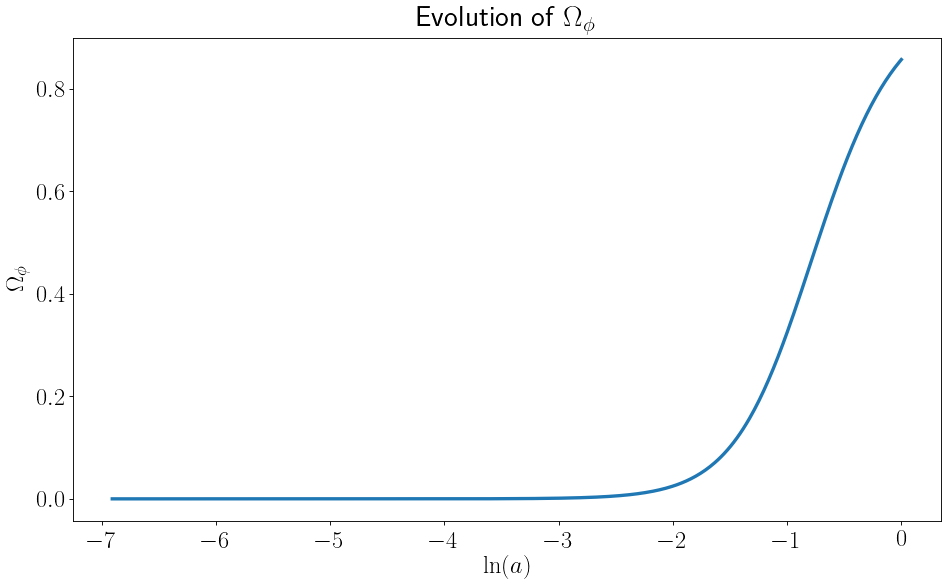

In [44]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(lna_array,soln_de[:,1], linewidth = 3)
plt.xlabel(r"$\ln (a)$")
plt.ylabel(r"$\Omega_\phi$")
plt.title(r'Evolution of $\Omega_\phi$')
plt.show()

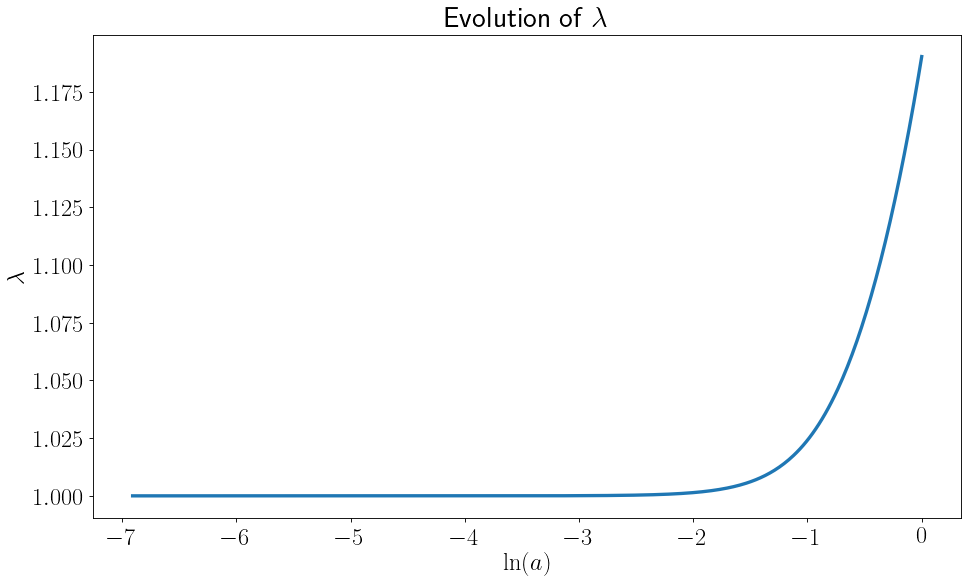

In [45]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(lna_array,soln_de[:,2], linewidth = 3)
plt.xlabel(r"$\ln (a)$")
plt.ylabel(r"$\lambda$")
plt.title(r'Evolution of $\lambda$')
plt.show()

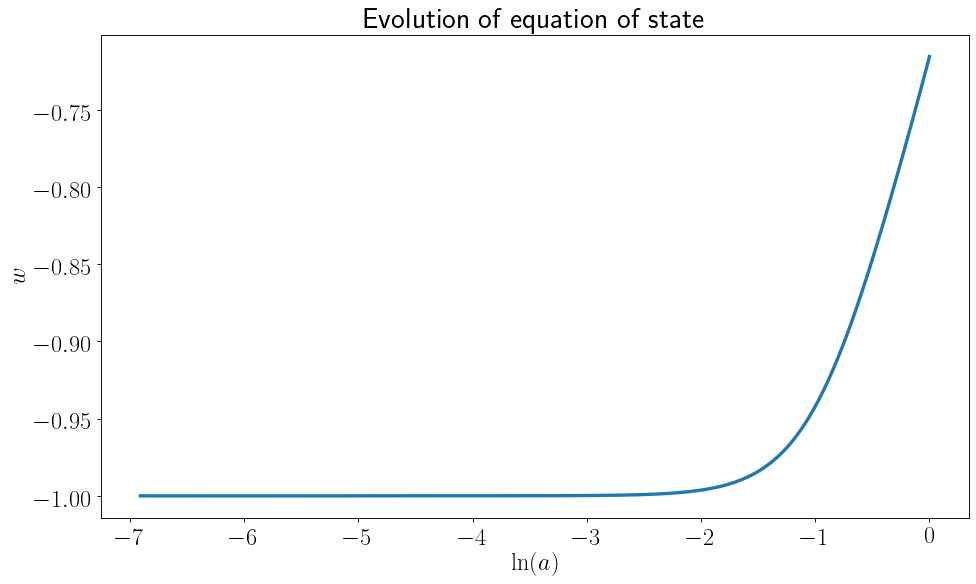

In [46]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(lna_array,soln_de[:,0]-1, linewidth = 3)
plt.xlabel(r"$\ln (a)$")
plt.ylabel(r"$w$")
plt.title(r'Evolution of equation of state')
plt.show()

## Parametrizing the energy density

Ref: Shafieloo, Hazra, Sahni, Starobinsky, Mon. Not. Roy. Astron. Soc. 473 (2018) 2760-2770 https://arxiv.org/pdf/1610.05192.pdf

$$\rho_{DE}(t)=\rho_{DE}(t_0) \times \exp[\Gamma(t-t_0)]$$

In [12]:
# Metastable dark energy equation

def dedecay_eqn(ydydx,x,GammaDEbyH,OmegaM):
    #Autonomous equations
    h=ydydx
    z=x
    a=1.0/(1.0+z)
    dhdz=(GammaDEbyH*a/2.0)+(3.0-GammaDEbyH/h)*OmegaM/(2.0*(a**2.0)*h)
    return dhdz                                    

In [13]:
# solution to decaying DE equations

z=np.linspace(0,10,100)
h_ic=1
GbyH=0.5
OmM=0.3
# Solve DE equations
soln_dedecay=integrate.odeint(dedecay_eqn,h_ic,z,args=(GbyH,OmM))

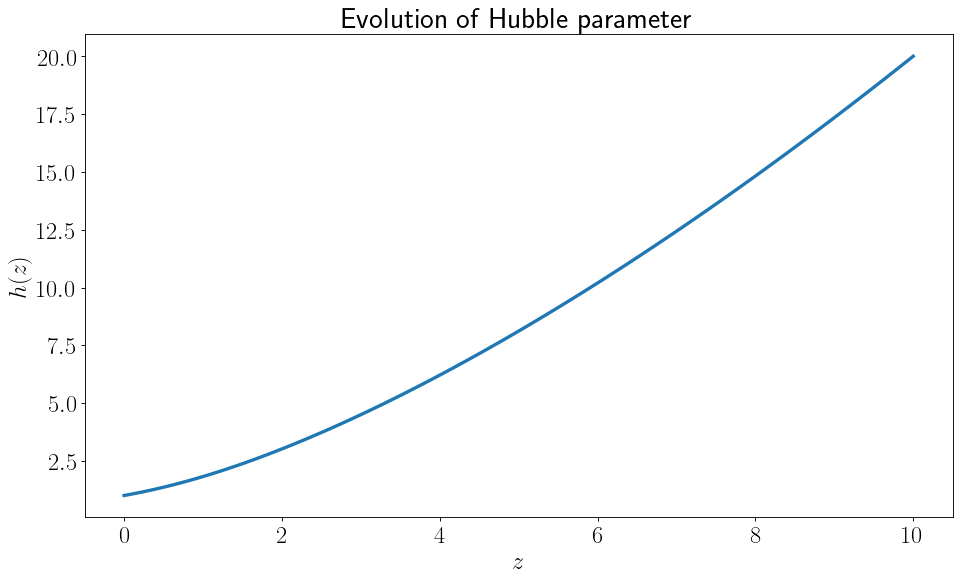

In [14]:
#h(z)
hz=np.zeros(len(z))
hz=soln_dedecay[:,0]

plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(z,hz, linewidth = 3)
plt.xlabel(r"$z$")
plt.ylabel(r"$h(z)$")
plt.title(r'Evolution of Hubble parameter')
plt.show()

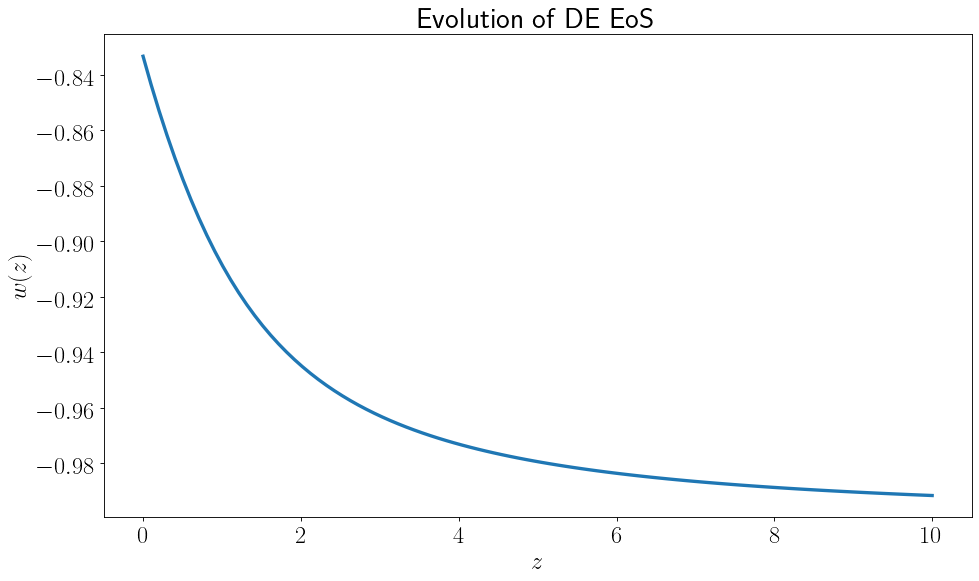

In [15]:
#w(z)
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(z,-1+GbyH/(3*hz), linewidth = 3)
plt.xlabel(r"$z$")
plt.ylabel(r"$w(z)$")
plt.title(r'Evolution of DE EoS')
plt.show()

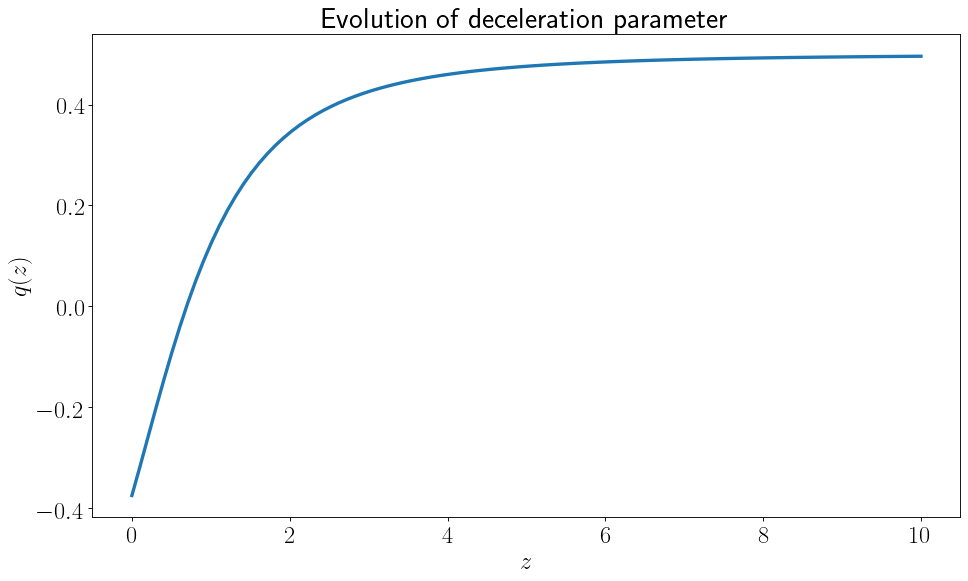

In [16]:
#q(z)
a=np.zeros(len(z))
dh=np.zeros(len(z))
qz=np.zeros(len(z))
a=az(z)


dh=dedecay_eqn(hz,z,GbyH,OmM)

qz=-1+dh/(a*hz)


plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(z,qz, linewidth = 3)
plt.xlabel(r"$z$")
plt.ylabel(r"$q(z)$")
plt.title(r'Evolution of deceleration parameter')
plt.show()

## Assignments

1. GCG model, get distance modulus as a function of parameter α
2. Get the distance modulus for the decaying model
3. Get deceleration parameter for different n values ranging from positive to negative values
4. Solve for the 2 other models of decaying dark energy

# Comparing models with data

## Supernovae Data

Union 2.1

**First plot the data to see how it looks**

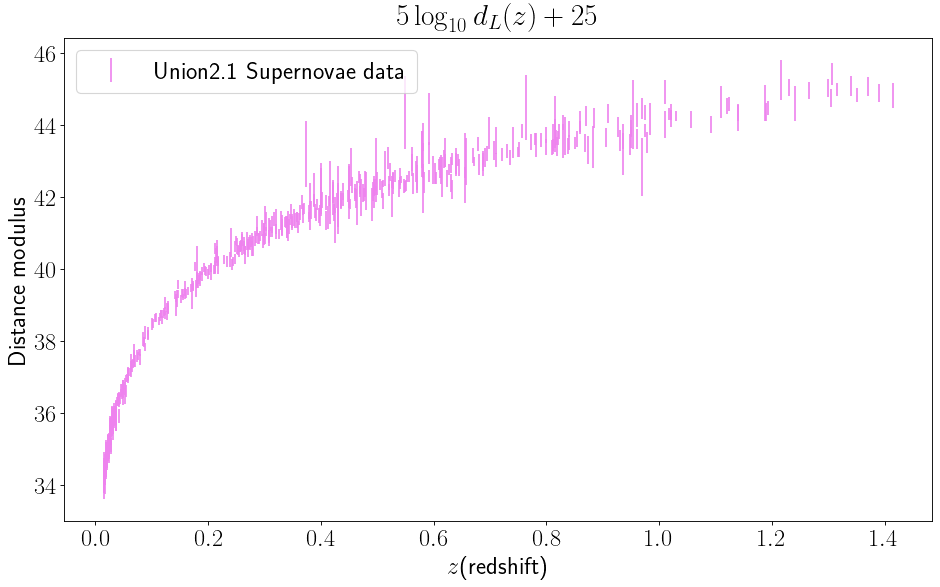

In [17]:
## Read data
z_SN,mu_SN,Delta_mu_SN=np.loadtxt('Data/sn_z_mu_dmu_plow_union2.1.txt',usecols=(1, 2, 3),  unpack=True)

plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
#plt.scatter(z_SN,mu_SN,alpha=0.3,s=8)
plt.errorbar(z_SN,mu_SN,yerr=Delta_mu_SN, linestyle="",
             label='Union2.1 Supernovae data',c='violet')
plt.xlabel("$z$(redshift)")
plt.ylabel("Distance modulus")
plt.title(r'$5\log_{10}d_L(z)+25$')
plt.legend()
plt.show()

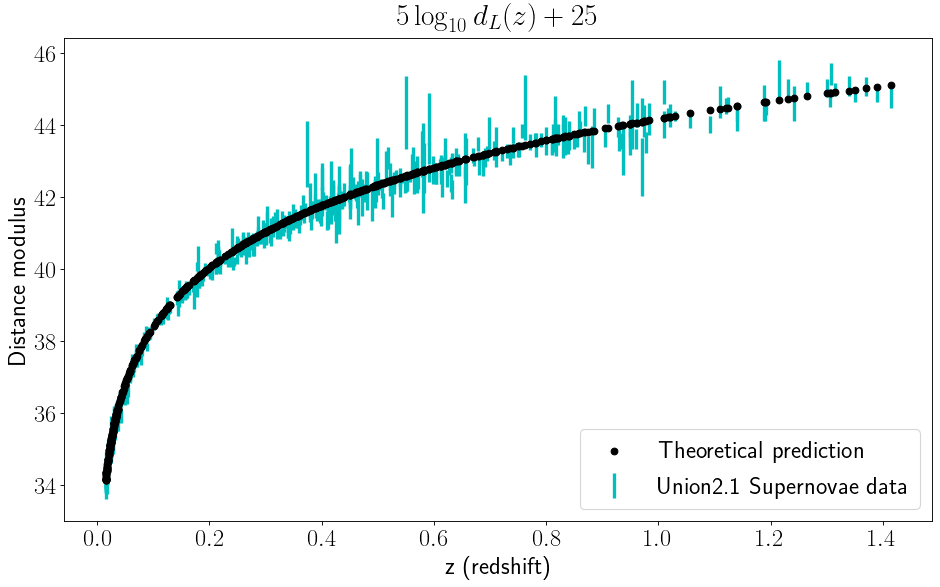

In [19]:
mu_T=np.zeros(len(z_SN))

for i in range(len(z_SN)):
        mu_T[i]=distance_modulus(z_SN[i],Omm,Omk,Omr,H0,w0_base,wa_base)

    
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(z_SN,mu_T,c='k',zorder=5,linestyle="-",label='Theoretical prediction')
plt.errorbar(z_SN,mu_SN,yerr=Delta_mu_SN, linestyle="",linewidth=3,
             label='Union2.1 Supernovae data',c='c',zorder=0)
plt.xlabel("z (redshift)")
plt.ylabel("Distance modulus")
plt.title(r'$5\log_{10}d_L(z)+25$')
plt.legend()
plt.savefig("Union-2.1-samples.png")

## Definition of goodness of fit

In simplest form:

$$\chi^2=\sum_{i=1}^{N}\left(\frac{D(i)-T(i)}{\sigma_i}\right)^2$$,

Here we have $N$ data points $D(i)$ and errors $\sigma(i)$. We estimate our theory $T(i)$ for a given set of parameters $\Theta$. To get the optimized $\Theta$, we should minimize $\chi^2$.

However, given the _**error covariance**_ the $\chi^2$ should be calculated as:

$$\chi^2=\sum_{i=1}^{N}\left[D(i)-T(i)\right]^T COV^{-1}\left[D(i)-T(i)\right]$$,

$COV^{-1}$ is the inverse covariance matrix where the diagonal terms are $1/\sigma^2(i)$


## Read inverese covariance matrix
**I am using it from cosmomc. It is already inverted**

In [21]:
import numpy as np
iCovmat = np.loadtxt("Data/sn_wmat_sys_union2.1.txt")

In [22]:
# Define \chi^2

def chisq_simple(D,T,E):
    chisq_simple=np.sum(((D-T)/E)**2.0)
    return chisq_simple

def chisq(Data,Theory,invcovmat):
    diff=Data-Theory
    diffT=diff.T
    chisq=diffT.dot(invcovmat.dot(diff))
    return chisq

In [23]:
mu_T=np.zeros(len(z_SN))

for i in range(len(z_SN)):
    mu_T[i]=distance_modulus(z_SN[i],Omm,Omk,Omr,H0,w0_base,wa_base)

print('$\chi^2$ test:',chisq(mu_SN,mu_T,iCovmat))

$\chi^2$ test: 545.3338610509184


In [24]:
def SN_Chisq(params):
    Omm,w0,wa=params
    Omk=0
    H0=70
    Oml=1-Omm-Omk-Pl.Omega_rB
    Omr=Pl.Omega_rB

    mu_T=np.zeros(len(z_SN))
    if Omm<0. or Omm >1 or w0 <-3 or w0 > 1 or wa >3 or wa <-3 : 
        return np.inf

    for i in range(len(z_SN)):
        mu_T[i]=distance_modulus(z_SN[i],Omm,Omk,Omr,H0,w0,wa)

    SN_Chisq=chisq(mu_SN,mu_T,iCovmat)
#    print(SN_Chisq)
    return SN_Chisq

def SN_loglike(params):
#   This is -\chi^2/2 
    SN_loglike=-0.5*SN_Chisq(params)
    return SN_loglike




from scipy.optimize import minimize
from scipy.optimize import Bounds

Om_bestfit=0.27
w0_bestfit=-1
wa_bestfit=0

bestfit=minimize(SN_Chisq, [Om_bestfit,w0_bestfit,wa_bestfit],method='Nelder-Mead')
print('Best-fit parameters:', bestfit['x'], '$\chi^2$',bestfit['fun'])
print(bestfit)

Best-fit parameters: [ 2.95811651e-01 -1.00160038e+00  1.64956792e-04] $\chi^2$ 545.1098809132717
 final_simplex: (array([[ 2.95811651e-01, -1.00160038e+00,  1.64956792e-04],
       [ 2.95811992e-01, -1.00161999e+00,  1.65468568e-04],
       [ 2.95782504e-01, -1.00151457e+00,  1.64880669e-04],
       [ 2.95783148e-01, -1.00150645e+00,  1.65186927e-04]]), array([545.10988091, 545.10988093, 545.10988093, 545.10988093]))
           fun: 545.1098809132717
       message: 'Optimization terminated successfully.'
          nfev: 75
           nit: 37
        status: 0
       success: True
             x: array([ 2.95811651e-01, -1.00160038e+00,  1.64956792e-04])


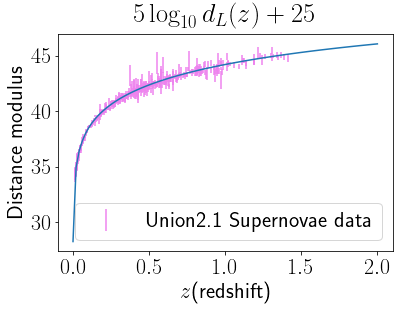

In [26]:
Om_bestfit=bestfit['x'][0]
w0_bestfit=bestfit['x'][1]
wa_bestfit=bestfit['x'][2]


z=np.linspace(1e-3,2,100)

mu=np.zeros(len(z))
for i in range(len(z)):
    mu[i]=distance_modulus(z[i],Om_bestfit,Omk,Omr,Pl.H0B,w0_bestfit,wa_bestfit)

plt.plot(z,mu)
plt.errorbar(z_SN,mu_SN,yerr=Delta_mu_SN, linestyle="",
             label='Union2.1 Supernovae data',c='violet')
plt.xlabel("$z$(redshift)")
plt.ylabel("Distance modulus")
plt.title(r'$5\log_{10}d_L(z)+25$')
plt.legend()
plt.show()

### Deceleration parameter

In [27]:
def h_a(a,Om_m,Om_k,Om_r,w0,wa):
    #this is simply h(z)=H(z)/H_0
    Om_de0=1-Om_m-Om_k-Om_r
    Om_de=OmegaDE(a,Om_de0,w0,wa)
    h_a=np.sqrt((Om_m/a**3.0)+Om_de+(Om_r/a**4.0)+(Om_k/a**2.0))
    return h_a

def dh_da(a,Om_m,Om_k,Om_r,w0,wa):
    #this is simply dh(z)/da
    Om_de0=1-Om_m-Om_k-Om_r
    Om_de=OmegaDE(a,Om_de0,w0,wa)
    dh_da=0.5/h_a(a,Om_m,Om_k,Om_r,w0,wa)
    dh_da=dh_da*(-(3.0*Om_m/a**4.0)-(3.0*Om_de*(1+w(a,w0,wa))/a)-(4.0*Om_r/a**5.0)-(2.0*Om_k/a**3.0))    
    return dh_da

def q(a,Om_m,Om_k,Om_r,w0,wa):
    #deceleration parameter
    q=-1.0-a*dh_da(a,Om_m,Om_k,Om_r,w0,wa)/h_a(a,Om_m,Om_k,Om_r,w0,wa)
    return q

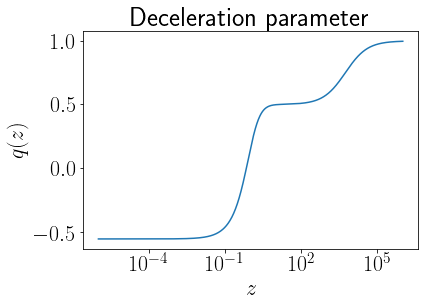

In [28]:
z=np.logspace(-6,6,1000)
a=np.zeros(len(z))
a=az(z)
qz=np.zeros(len(z))

Omm=Om_bestfit
w0=w0_bestfit
wa=wa_bestfit
Omk=0.0
Omr=Pl.Omega_rB


for i in range(len(z)):
    qz[i]=q(a[i],Omm,Omk,Omr,w0,wa)

# plotting deceleration parameter
plt.plot(z,qz)
plt.xscale('log')
plt.xlabel('$z$')
plt.ylabel('$q(z)$')
plt.xlabel('$z$')
plt.ylabel('$q(z)$')
plt.title('Deceleration parameter')
#plt.plot(z, q(a,Om_bestfit,Omk,Omr,w0,wa), color="r", lw=2, alpha=0.8)

plt.savefig("Union-2.1-qz-samples-wde.png")

## Markov Chain Monte Carlo

We will use emcee routine to compare Supernovae data with standard w0waCDM cosmology. We have 3 free parameters, $\Omega_m$, $w_0$ and $w_a$.

In [39]:
import emcee

# initial points
ndim, nwalkers = 3, 100 
p0 = np.random.normal([Om_bestfit,w0_bestfit,wa_bestfit],
                      [0.1,0.5,0.5],
                      size=(nwalkers, ndim))
# sample
niter = 500
sampler = emcee.EnsembleSampler(nwalkers, ndim, SN_loglike)
sampler.run_mcmc(p0, niter, progress=True);

100%|██████████| 500/500 [2:02:22<00:00, 14.69s/it]  


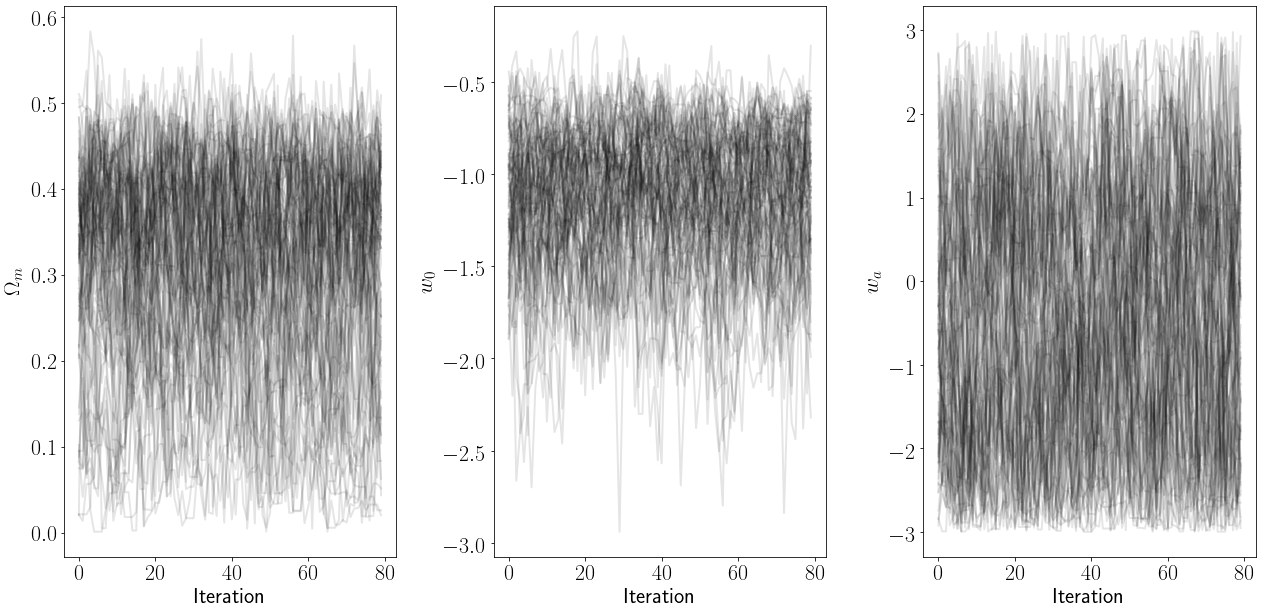

In [40]:
params = [r'$\Omega_m$', r'$w_0$',r'$w_a$']
thin, discard = 5, 100
# plot traces of parameters
plt.figure(figsize=(18, 9))
for i in range(ndim):
    plt.subplot(1, 3, i+1)
    plt.plot(sampler.get_chain(thin=thin, discard=discard)[:, :, i]
    , color='black', alpha=0.1, lw=2)
    plt.xlabel('Iteration')
    plt.ylabel(params[i])
plt.tight_layout()

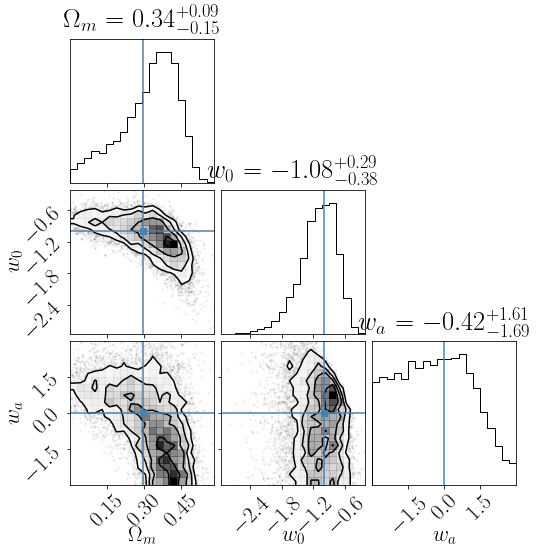

In [41]:
import corner
# plot 1-D, 2-D marginal distributions
fig=corner.corner(sampler.get_chain(thin=thin, discard=discard, flat=True),\
              labels=params, show_titles=True,truths=bestfit['x']);

fig.savefig("Union-2.1-wde.png")

## Bounds on the parameters

In [42]:
#samples[:, 1] = np.exp(samples[:, 1])
samples = sampler.chain[:, discard:, :].reshape((-1, ndim))
Omm_mcmc, w0_mcmc, wa_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(samples, [16, 50, 84],
                                                axis=0)))
print(Omm_mcmc, w0_mcmc, wa_mcmc)

(0.34234326416503935, 0.08591677028369304, 0.14952285456158088) (-1.0744666113853056, 0.2916862326290619, 0.3825286669308139) (-0.41648143593016074, 1.6115593098147543, 1.6755621209822922)


## Plotting the samples of distance modulus

In [43]:
def mu_samples(params,zarray):
    Omm,w0,wa=params
    Omr=Pl.Omega_rB
    Oml=1-Omm-Omr
    Omk=0.0
    mu_samples=np.zeros(len(zarray))
    for i in range(len(zarray)):
        mu_samples[i]=distance_modulus(zarray[i],Omm,Omk,Omr,H0,w0,wa)        
    return mu_samples 
    
z=np.linspace(0.85,1.4,100)

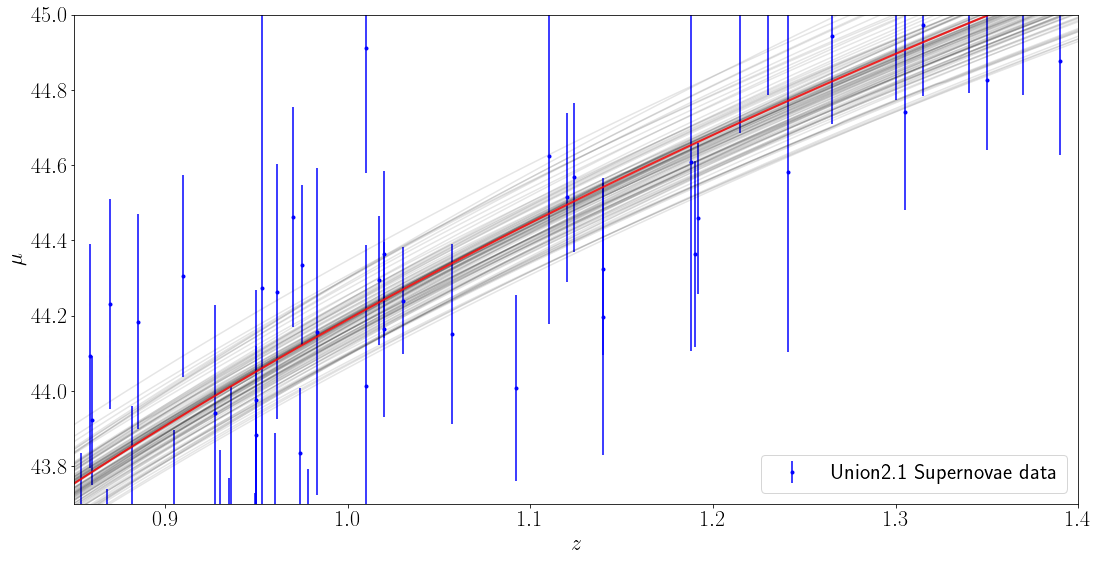

In [44]:
plt.figure(figsize=(18, 9))
for Omm, w0, wa in samples[np.random.randint(len(samples), size=100)]:
    plt.plot(z, mu_samples([Omm, w0, wa],z), color="k", alpha=0.1)
plt.xlim(z[0],z[-1])    
plt.ylim(43.7,45)    
plt.xlabel('$z$')
plt.ylabel('$\mu$')
plt.plot(z, mu_samples([Om_bestfit,w0_bestfit,wa_bestfit],z), color="r", lw=2, alpha=0.8)
plt.errorbar(z_SN,mu_SN,yerr=Delta_mu_SN, linestyle="",
             label='Union2.1 Supernovae data',fmt=".b")
plt.legend()

plt.savefig("Union-2.1-samples-wde.png")

## Plotting the samples of deceleration parameter

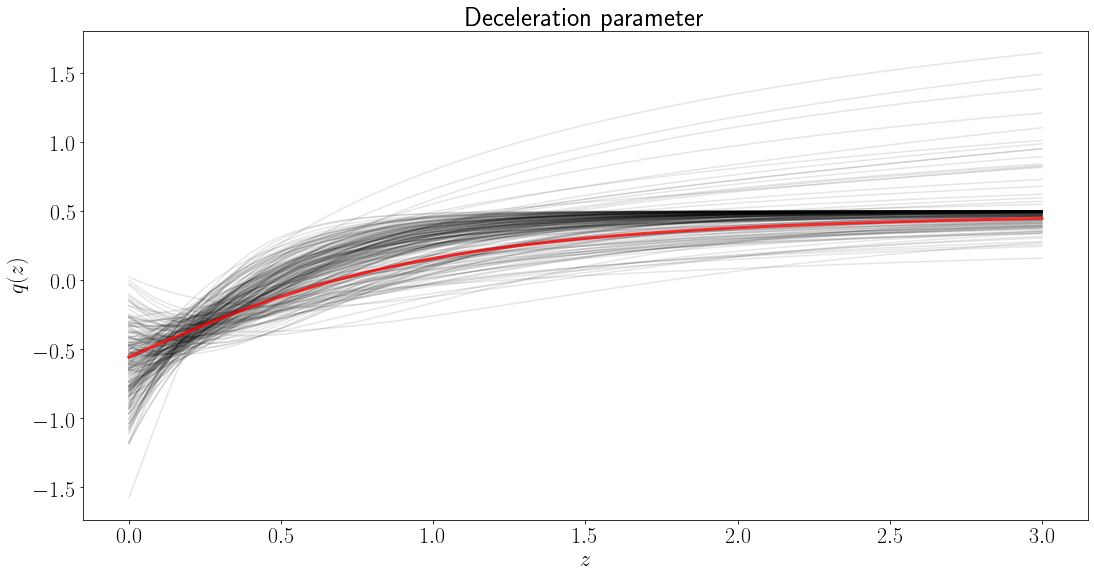

In [45]:
z=np.linspace(0,3,100)
qz=np.zeros(len(z))
a=np.zeros(len(z))

a=az(z)

Omm=Om_bestfit
Omk=0.0
Omr=Pl.Omega_rB


# plotting deceleration parameter
plt.figure(figsize=(18, 9))
for Omm, w0, wa in samples[np.random.randint(len(samples), size=200)]:
    for i in range(len(z)):
        qz[i]=q(a[i],Omm,Omk,Omr,w0,wa)
    plt.plot(z, qz, color="k", alpha=0.1)
plt.xlabel('$z$')
plt.ylabel('$q(z)$')
plt.title('Deceleration parameter')
for i in range(len(z)):
    qz[i]=q(a[i],Om_bestfit,Omk,Omr,w0_bestfit,wa_bestfit)
plt.plot(z, qz, color="r", lw=3, alpha=0.8)

plt.savefig("Union-2.1-qz-samples-wde.png")

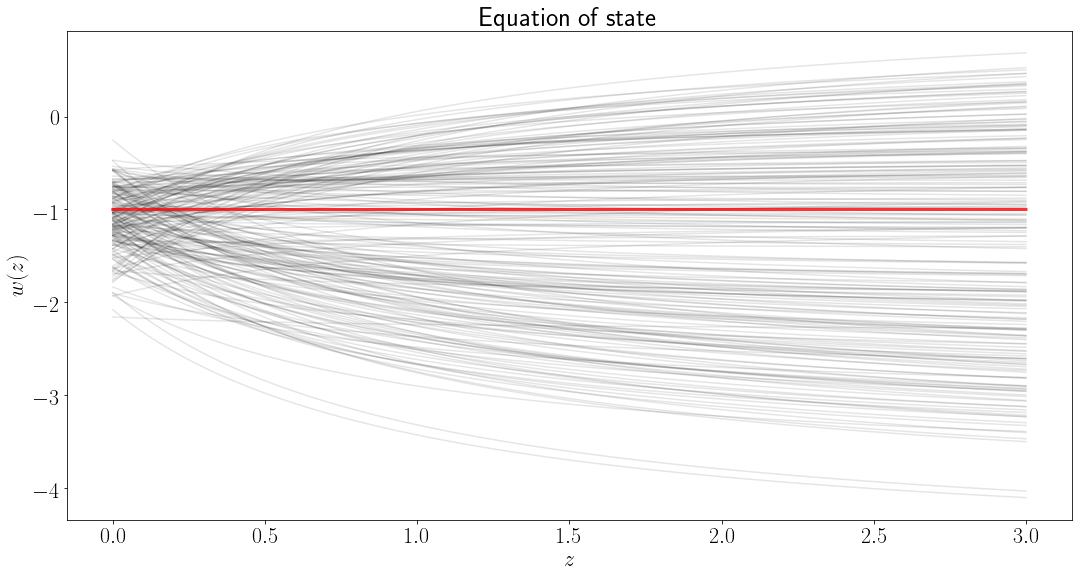

In [46]:
plt.figure(figsize=(18, 9))
for Omm, w0, wa in samples[np.random.randint(len(samples), size=200)]:
      plt.plot(z, w(a,w0,wa), color="k", alpha=0.1)
plt.xlabel('$z$')
plt.ylabel('$w(z)$')
plt.title('Equation of state')
plt.plot(z, w(a,w0_bestfit,wa_bestfit), color="r", lw=3, alpha=0.8)

plt.savefig("Union-2.1-wz-samples.png")

## Baryon Acoustic Oscillations (BAO)

$r_d$ is the radius of the sound horizon at the redshift $z_d$ when baryons got freed from the photon drag. 
$z_d$ is calculated exactly in CAMB. However, for simplicity we use the analytical fitting formula for $z_d$ from Hu & Sugiyama and Eisenstein & Hu.

$$z_d=\frac{1291(\Omega_mh^2)^{0.251}}{1+0.659(\Omega_mh^2)^{0.828}}[1+b_1(\Omega_bh^2)^{b_2}]$$
$$b_1=0.313(\Omega_mh^2)^{-0.419}[1+0.607(\Omega_mh^2)^{0.674}]$$
$$b_2=0.238(\Omega_mh^2)^{0.223}$$


Epoch of decoupling $z_*$ is given as:

$$z_*=1048[1+0.00124(\Omega_bh^2)^{-0.738}][1+g_1(\Omega_mh^2)^{g_2}]$$
$$g_1=\frac{0.0783(\Omega_bh^2)^{-0.238}}{1+39.5(\Omega_bh^2)^{1.81}}$$
$$g_2=\frac{0.56}{1+21.1(\Omega_bh^2)^{1.81}}$$

In [47]:
# define z_* and z_drag
def zstar(Om_b,Om_m,H0):
    h=H0/100.0
    ombh2=Om_b*h**2.0
    ommh2=Om_m*h**2.0
    g1=(0.0783*(ombh2)**(-0.238))/(1.0+39.5*ombh2**(0.763))
    g2=0.56/(1.0+21.1*ombh2**1.81)
    zstar=1048.0*(1+0.00124*ombh2**(-0.738))*(1.0+g1*ommh2**g2)
    return zstar

def zdrag(Om_b,Om_m,H0):
    h=H0/100.0
    ombh2=Om_b*h**2.0
    ommh2=Om_m*h**2.0
    g1=(0.313*(ommh2)**(-0.419))*(1.0+0.607*ommh2**(0.674))
    g2=0.238*ommh2**0.223
    zdrag=((1291.0*ommh2**(0.251))/(1+0.659*(ommh2)**0.828))*(1.0+g1*(ombh2)**g2)
    return zdrag

### Comoving sound horizon

The comoving sound horizon is given by:

$$r_s(z)=\int_0^a\frac{c_s da'}{a'^2H(z)}$$

$$c_s=\frac{c}{\sqrt{3(1+\frac{3\Omega_b a}{4\Omega_r}})}$$

Note here: Relativistic neutrino density should be added. Check what happens if you do not include that. In which direction the $r_s$ goes.

In [52]:
## rs
def rs_integrand(a,Om_b,Om_m,Om_k,Om_r,H0,w0,wa):
    Om_de0=1-Om_m-Om_k-Om_r
    Om_de=OmegaDE(a,Om_de0,w0,wa)
    # massless species # assume 3 
    Omr_massless=3.0*Om_r*(7.0/8.0)*(4.0/11.0)**(4.0/3.0)
    asquareH=H0*np.sqrt((Om_m*a)+Om_r+Omr_massless+(Om_k*a**2)+(Om_de*a**4))
    Rb=(3.0*Om_b*a)/(4.0*Om_r)
    rs_integrand=const.CKm/(np.sqrt(3.0*(1.0+Rb))*asquareH)    
    return rs_integrand

def rs(a,Om_b,Om_m,Om_k,Om_r,H0,w0,wa):
    #In Mpc
    rs=integrate.romberg(rs_integrand,1e-9,a,args=(Om_b,Om_m,Om_k,Om_r,H0,w0,wa),rtol=1e-3)    
    return rs    


def BAO_DMRs(a,Om_b,Om_m,Om_k,Om_r,H0,w0,wa):
    zd=zdrag(Om_b,Om_m,H0)
    ad=az(zd)
    d_M=Comov_Distance(a,Om_m,Om_k,Om_r,H0,w0,wa)
    r_d=rs(ad,Om_b,Om_m,Om_k,Om_r,H0,w0,wa)
    BAO_DMRs=d_M/r_d
    return BAO_DMRs


def BAO_DHRs(a,Om_b,Om_m,Om_k,Om_r,H0,w0,wa):
    zd=zdrag(Om_b,Om_m,H0)
    ad=az(zd)
    dH=d_H(a,Om_m,Om_k,Om_r,H0,w0,wa)
    r_d=rs(ad,Om_b,Om_m,Om_k,Om_r,H0,w0,wa)
    BAO_DHRs=dH/r_d
    return BAO_DHRs


def BAO_DVRs(a,Om_b,Om_m,Om_k,Om_r,H0,w0,wa):
    zd=zdrag(Om_b,Om_m,H0)
    ad=az(zd)    
    dH=d_H(a,Om_m,Om_k,Om_r,H0,w0,wa)
    d_M=Comov_Distance(a,Om_m,Om_k,Om_r,H0,w0,wa)
    d_V=(((1.0/a)-1.0)*dH*(d_M**2.0))**(1.0/3.0)
    r_d=rs(ad,Om_b,Om_m,Om_k,Om_r,H0,w0,wa)
    BAO_DVRs=d_V/r_d
    return BAO_DVRs


H0=Pl.H0B
Omega_bBh2=0.0224
Omega_bB=Omega_bBh2/(H0/100.0)**2
Omm=Pl.Omega_mB
Omr=Pl.Omega_rB
Omk=0
Omb=Omega_bB
zd=zdrag(Omb,Omm,H0)
print(zd)
zs=zstar(Omb,Omm,H0)
print(zs)



a=az(zs)
w0=-1
wa=0
print(rs(a,Omb,Omm,Omk,Omr,H0,w0,wa))

1020.7874051453557
1091.8690271388914
144.3350650897108


### BAO Data and likelihood

Here we load the BAO data compilation and deifine the chisquare. Later we will define the joint likelihood function.

In [55]:
# BAO likelihood
#6DFGRS, MGS, BOSS lowZ
#Data_dVRs= np.array([[0.106,3.047,0.137],[0.15,4.48,0.168],[0.32,8.467,0.167]])
# Just using one Dv/Rs data now 

Data_dVRs= np.array([[0.106,3.047,1e30],[0.15,4.48,0.168],[0.32,8.467,1e30]])
# BOSS, Ly-alpha
Data_dMRs= np.array([[0.57,14.945,0.2],[2.34,37.675,2.171],[2.36,36.288,1.344]])


def chisq_BAODVrs(params):            
    Om_b,Om_m,H0,w0,wa=params
    Om_k=0
    Om_r=Pl.Omega_rB
    za=Data_dVRs[:,0]
    a=az(za)
    BAO_DVRsT=np.zeros(len(a))
    for i in range(len(a)):
        BAO_DVRsT[i]=BAO_DVRs(a[i],Om_b,Om_m,Om_k,Om_r,H0,w0,wa)
    chisq_BAODVrs=np.sum(((BAO_DVRsT-Data_dVRs[:,1])/Data_dVRs[:,2])**2.0)
    #print((BAO_DVRsT-Data_dVRs[:,1])/Data_dVRs[:,2])
    return chisq_BAODVrs

def chisq_BAODMrs(params):        
    Om_b,Om_m,H0,w0,wa=params
    Om_k=0
    Om_r=Pl.Omega_rB
    za=Data_dMRs[:,0]
    a=az(za)
    BAO_DMRsT=np.zeros(len(a))
    for i in range(len(a)):
        BAO_DMRsT[i]=BAO_DMRs(a[i],Om_b,Om_m,Om_k,Om_r,H0,w0,wa)
    chisq_BAODMrs=np.sum(((BAO_DMRsT-Data_dMRs[:,1])/Data_dMRs[:,2])**2.0)
    return chisq_BAODMrs


params=[Omb,Omm,H0,w0,wa]
print(chisq_BAODVrs(params),chisq_BAODMrs(params))

22.84759196696397 8.222743696838895


## CMB shift parameters

$R$: Comoving distance to decoupling epoch

$l_a$: Ratio between comving distance and comoving sound horizon to the decoupling epoch

$$R=\sqrt{\Omega_mH_0^2}d_c(z_*)/c$$
$$l_a=\pi d_c(z_*)/r_s(z_*)$$

In [56]:
def ShiftCMB(Om_b,Om_m,Om_k,Om_r,H0,w0,wa):    
    alowlim=1e-9
    zst=zstar(Om_b,Om_m,H0)
    ast=az(zst)
    rszst=rs(ast,Om_b,Om_m,Om_k,Om_r,H0,w0,wa)
    rzst=Comov_Distance(ast,Om_m,Om_k,Om_r,H0,w0,wa)
    R=np.sqrt(Om_m*(H0**2.0))*rzst/const.CKm
    la=const.pi*rzst/rszst
    return R,la    

print('Shift parameters are (R,l_a):',ShiftCMB(Omb,Omm,Omk,Omr,H0,w0,wa))

Shift parameters are (R,l_a): (1.7530406945381851, 302.4312448894604)


### CMB summary data

Here we define CMB summary data (shift parameters and baryon density constraints) and their likelihood.

In [57]:
## CMB summary data

CMB_Summary_Data=np.array([[1.7407,0.0094],[301.57,0.18],[0.02228,0.0003]])

def CMB_Summary_chisq(params):
    Om_b,Om_m,H0,w0,wa=params
    Om_k=0
    Om_r=Pl.Omega_rB    
    T=np.zeros(3)
    Rla=ShiftCMB(Om_b,Om_m,Om_k,Om_r,H0,w0,wa)
    T=[Rla[0],Rla[1],Om_b*(H0/100.0)**2.0]
    CMB_Summary_chisq=np.sum(((T-CMB_Summary_Data[:,0])/CMB_Summary_Data[:,1])**2.0)
    #print((T-CMB_Summary_Data[:,0])/CMB_Summary_Data[:,1])
    return CMB_Summary_chisq

params=[Omb,Omm,H0,w0,wa]
print(CMB_Summary_chisq(params))

24.776843507326305


### Joint Likelihood of BAO and CMB summary statistics

We add the $\chi^2$'s from 6 BAO data and 3 CMB summary data and define the joint likelihood.

In [58]:
## joint likelihood

def BAO_CMBsummary_chisq(params):
    Om_b,Om_m,H0,w0,wa=params    
    BAO_CMBsummary_chisq=CMB_Summary_chisq(params)+chisq_BAODVrs(params)+chisq_BAODMrs(params)

    if Om_m<0. or Om_m >1 or w0 <-2.5 or w0 > -0.5 or wa >3 or wa <-3 or H0 >80 or H0 < 60: 
        return np.inf
    
    return BAO_CMBsummary_chisq

def BAO_CMBsummary_like(params):
    Om_b,Om_m,H0,w0,wa=params
    BAO_CMBsummary_like=-0.5*BAO_CMBsummary_chisq(params)
    return BAO_CMBsummary_like

In [59]:
# Bestfit


Omb_bestfit=0.044
Omm_bestfit=0.31
H0_bestfit=67.0
w0_bestfit=-1.0
wa_bestfit=0.0

bestfit=minimize(BAO_CMBsummary_chisq, [Omb_bestfit,Omm_bestfit,H0_bestfit,w0_bestfit,wa_bestfit],method='Nelder-Mead')
print('Best-fit parameters:', bestfit['x'], '$\chi^2$',bestfit['fun'])
print(bestfit)

Best-fit parameters: [ 6.22215998e-02  3.47151648e-01  6.00000098e+01 -8.67181959e-01
  1.02921705e-03] $\chi^2$ 18.502144713107825
 final_simplex: (array([[ 6.22215998e-02,  3.47151648e-01,  6.00000098e+01,
        -8.67181959e-01,  1.02921705e-03],
       [ 6.22230973e-02,  3.47167265e-01,  6.00000372e+01,
        -8.67202074e-01,  1.02791873e-03],
       [ 6.22215405e-02,  3.47128637e-01,  6.00000106e+01,
        -8.67104152e-01,  1.03101090e-03],
       [ 6.22260081e-02,  3.47151763e-01,  6.00000232e+01,
        -8.67114913e-01,  1.02962224e-03],
       [ 6.22227490e-02,  3.47145135e-01,  6.00000321e+01,
        -8.67139402e-01,  1.02977241e-03],
       [ 6.22232471e-02,  3.47143358e-01,  6.00000464e+01,
        -8.67110475e-01,  1.02964851e-03]]), array([18.50214471, 18.50216818, 18.50217187, 18.50217825, 18.50218053,
       18.5021829 ]))
           fun: 18.502144713107825
       message: 'Optimization terminated successfully.'
          nfev: 547
           nit: 330
        stat

In [60]:
## joint liklelihood with SN

def H0_chisq(H0):
    H0_Data=74.03
    H0_Err=1.42
    H0_chisq=((H0-H0_Data)/H0_Err)**2.0
    return H0_chisq

def SN_BAO_H0_CMBsummary_chisq(params):
    Om_b,Om_m,H0,w0,wa=params
    snparams=[Om_m,w0,wa]
    SN_BAO_H0_CMBsummary_chisq=CMB_Summary_chisq(params)+chisq_BAODVrs(params)+chisq_BAODMrs(params)+ SN_Chisq(snparams)+H0_chisq(H0)
    if Om_m<0. or Om_m >1 or w0 <-2.5 or w0 > -0.5 or wa >3 or wa <-3: 
        return np.inf
    return SN_BAO_H0_CMBsummary_chisq


def SN_BAO_H0_CMBsummary_like(params):
    Om_b,Om_m,H0,w0,wa=params
    snparams=[Om_m,w0,wa]
    SN_BAO_H0_CMBsummary_like=-0.5*SN_BAO_H0_CMBsummary_chisq(params)
    return SN_BAO_H0_CMBsummary_like    
    
    
Omb_bestfit=0.044
Omm_bestfit=0.31
H0_bestfit=67.0
w0_bestfit=-1.0
wa_bestfit=0.0

bestfit=minimize(SN_BAO_H0_CMBsummary_chisq, [Omb_bestfit,Omm_bestfit,H0_bestfit,w0_bestfit,wa_bestfit],method='Nelder-Mead')
print('Best-fit parameters:', bestfit['x'], '$\chi^2$',bestfit['fun'])
print(bestfit)

Best-fit parameters: [ 4.27461057e-02  3.00701890e-01  7.24005337e+01 -1.37764414e+00
  1.16353318e+00] $\chi^2$ 581.9340733352178
 final_simplex: (array([[ 4.27461057e-02,  3.00701890e-01,  7.24005337e+01,
        -1.37764414e+00,  1.16353318e+00],
       [ 4.27461852e-02,  3.00701843e-01,  7.24004383e+01,
        -1.37763792e+00,  1.16351935e+00],
       [ 4.27461611e-02,  3.00701482e-01,  7.24004991e+01,
        -1.37763286e+00,  1.16350759e+00],
       [ 4.27460523e-02,  3.00701452e-01,  7.24005559e+01,
        -1.37762703e+00,  1.16348692e+00],
       [ 4.27461584e-02,  3.00700943e-01,  7.24004468e+01,
        -1.37764630e+00,  1.16355332e+00],
       [ 4.27460889e-02,  3.00701727e-01,  7.24005380e+01,
        -1.37762578e+00,  1.16347978e+00]]), array([581.93407334, 581.93407334, 581.93407334, 581.93407334,
       581.93407335, 581.93407335]))
           fun: 581.9340733352178
       message: 'Optimization terminated successfully.'
          nfev: 719
           nit: 432
        

## Assignments

### Small assignments
1. Get all the quantities for a non-flat Universe
2. Estimate parameters jointly from SN, BAO and CMB summary statistics
3. Reproduce Figure 1 of Auborg et. al.
4. Find the differences between CAMB and this code (since we are using fitting formulae for $z_d$ and $z_*$)

### Moderate assignment
1. Estimate parameters jointly with addition of $\Omega_k$